In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')
warnings.simplefilter(action='ignore', category=FutureWarning)

### 10

In [3]:
# Load dataset
weekly = pd.read_csv('../../data/Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
# Create X and Y matrices
X = weekly.loc[:,weekly.columns != 'Direction']
y = weekly['Direction']

### b

In [7]:
# Run logistic regression
X_cons = sm.add_constant(X)

formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'
log = smf.glm(formula = formula, data=weekly, family=sm.families.Binomial()).fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Sun, 05 Sep 2021   Deviance:                       1486.4
Time:                                          13:00:27   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
==============================================================================
"""

### c

In [12]:
# Create predictions and produce confusion matrix/classification report
predictions = log.predict()
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]

print(confusion_matrix(weekly["Direction"], 
                       predictions_nominal))

print(classification_report(weekly["Direction"], 
                            predictions_nominal, 
                            digits = 3))

[[ 54 430]
 [ 48 557]]
              precision    recall  f1-score   support

        Down      0.529     0.112     0.184       484
          Up      0.564     0.921     0.700       605

    accuracy                          0.561      1089
   macro avg      0.547     0.516     0.442      1089
weighted avg      0.549     0.561     0.471      1089



In [18]:
# Rerun above using only years 1990-2008
weekly_train = weekly[weekly['Year'] <= 2008]
weekly_test = weekly[weekly['Year'] > 2008]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
985,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,Down
986,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,Down
987,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,Down
988,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,Down
989,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


### d

In [19]:
formula = 'Direction ~ Lag2'
log = smf.glm(formula = formula, data=weekly_train, family=sm.families.Binomial()).fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      983
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -675.27
Date:                                  Sun, 05 Sep 2021   Deviance:                       1350.5
Time:                                          13:12:25   Pearson chi2:                     985.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2033      0.064     -3.162      0.002      -0.329      -0.077
Lag2          -0.0581      0.029     -2.024      0.043      -0.114      -0.002
==============================================================================
"""

In [23]:
predictions = log.predict(weekly_test)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]

print(confusion_matrix(weekly_test["Direction"], 
                       predictions_nominal))

print(classification_report(weekly_test["Direction"], 
                            predictions_nominal, 
                            digits = 3))

[[ 9 34]
 [ 5 56]]
              precision    recall  f1-score   support

        Down      0.643     0.209     0.316        43
          Up      0.622     0.918     0.742        61

    accuracy                          0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104



### e

In [28]:
# Using LDA

# Create X and Y matrices
X = weekly.loc[:,weekly.columns != 'Direction']
y = weekly['Direction']

X_train = weekly[weekly['Year'] <= 2008]
y_train = X_train['Direction']
X_train = X_train.loc[:, X_train.columns != 'Direction']

X_test = weekly[weekly['Year'] > 2008]
y_test = X_test['Direction']
X_test = X_test.loc[:, X_test.columns != 'Direction']

In [30]:
lda = LinearDiscriminantAnalysis(solver='svd')
model = lda.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, 
                       y_pred))

print(classification_report(y_test, 
                            y_pred, 
                            digits = 3))

[[36  7]
 [ 0 61]]
              precision    recall  f1-score   support

        Down      1.000     0.837     0.911        43
          Up      0.897     1.000     0.946        61

    accuracy                          0.933       104
   macro avg      0.949     0.919     0.929       104
weighted avg      0.940     0.933     0.932       104



### f

In [31]:
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, 
                       y_pred))

print(classification_report(y_test, 
                            y_pred, 
                            digits = 3))

[[43  0]
 [12 49]]
              precision    recall  f1-score   support

        Down      0.782     1.000     0.878        43
          Up      1.000     0.803     0.891        61

    accuracy                          0.885       104
   macro avg      0.891     0.902     0.884       104
weighted avg      0.910     0.885     0.885       104



### g

In [32]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, 
                       y_pred))

print(classification_report(y_test, 
                            y_pred, 
                            digits = 3))

[[37  6]
 [15 46]]
              precision    recall  f1-score   support

        Down      0.712     0.860     0.779        43
          Up      0.885     0.754     0.814        61

    accuracy                          0.798       104
   macro avg      0.798     0.807     0.797       104
weighted avg      0.813     0.798     0.800       104



### 11

In [48]:
# Load dataset
auto = pd.read_csv('../../data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### a

In [49]:
# Create new var
med = np.median(auto['mpg'])
auto['mpg01'] = [1 if x>med else 0 for x in auto['mpg']]
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


### b

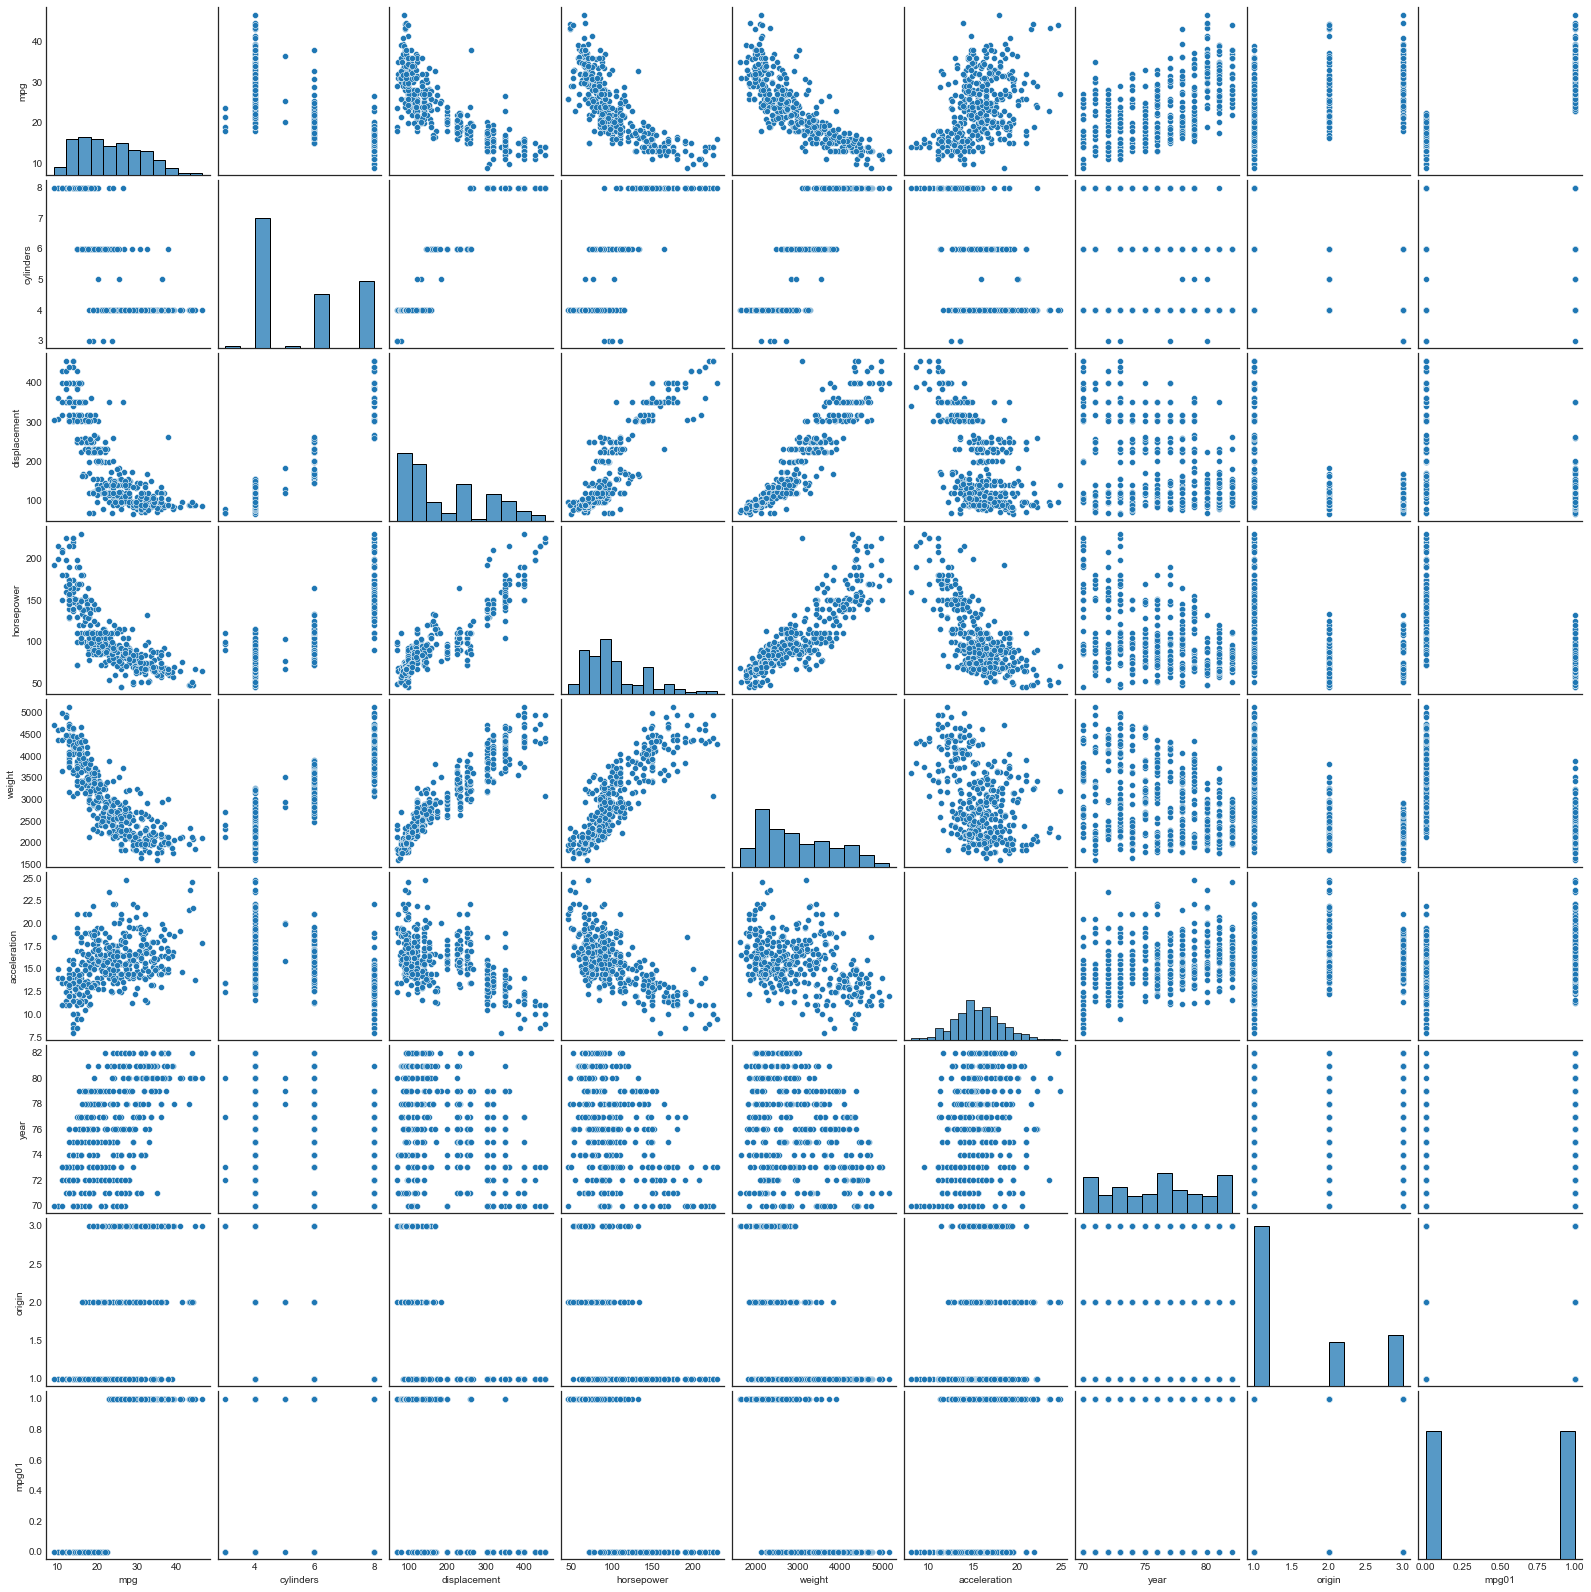

In [39]:
sns.pairplot(auto) 

### c

In [50]:
from sklearn.model_selection import train_test_split
X = auto.drop(['mpg01','name'], axis = 1)
y = auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

### d

In [53]:
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis(solver='svd')
model = lda.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'LDA Test Error: {1-accuracy_score(y_test,y_pred)}')

Test Error: 0.11224489795918369


In [54]:
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'QDA Test Error: {1-accuracy_score(y_test,y_pred)}')

Test Error: 0.12244897959183676


In [61]:
clf = skl_lm.LogisticRegression(solver='newton-cg', max_iter = 10000)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Logit Test Error: {1-accuracy_score(y_test,y_pred)}')
print(confusion_matrix(y_test, 
                       y_pred))

Logit Test Error: 0.0
[[48  0]
 [ 0 50]]


### 12

In [63]:
def power1(num = 2):
    
    return print(num ** 3)
power1()

27


In [64]:
def power2(x,a):
    
    return print(x ** a)
power2(3,8)

6561


In [65]:
def power3(x,a):
    
    result = x ** a
    return result

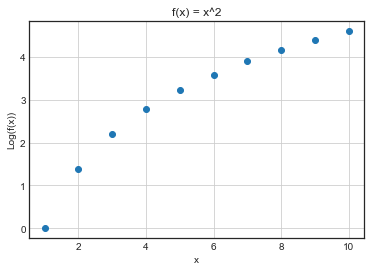

In [75]:
y = list(range(1,11))
f_x = [power3(x,2) for x in y]

fig,ax = plt.subplots(1,1)
ax.scatter(y,np.log(f_x))
ax.set_title('f(x) = x^2')
ax.set_xlabel('x')
ax.set_ylabel('Log(f(x))')
ax.grid(True)

In [77]:
def PlotPower(a, inp = []):
    
    y = [power3(x,a) for x in inp]
    fig,ax = plt.subplots(1,1)
    ax.scatter(inp,y)
    ax.set_title(f'f(x) = x^{a}')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)

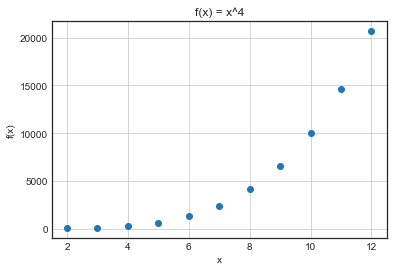

In [80]:
PlotPower(4, list(range(2,13)))

### 13

In [81]:
# Load dataset
boston = pd.read_csv('../../data/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [86]:
# Create outcome variable
med = np.median(boston['crim'])
boston['outcome'] = [1 if x>med else 0 for x in boston['crim']]
#len(boston[boston.outcome == 0])
len(boston)

506

In [87]:
# Prepare datasets
boston = boston.drop('crim', axis=1)
X = boston.drop('outcome', axis =1)
y = boston['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [88]:
# Fit Logistic Regression
clf = skl_lm.LogisticRegression(solver='newton-cg', max_iter = 10000)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Logit Test Error: {1-accuracy_score(y_test,y_pred)}')

Logit Test Error: 0.15748031496062997


In [89]:
# Fit LDA
lda = LinearDiscriminantAnalysis(solver='svd')
model = lda.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'LDA Test Error: {1-accuracy_score(y_test,y_pred)}')

LDA Test Error: 0.12598425196850394


In [90]:
# Fit QDA 
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'QDA Test Error: {1-accuracy_score(y_test,y_pred)}')

QDA Test Error: 0.11023622047244097
